In [22]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn import model_selection,metrics,feature_extraction
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,roc_auc_score
%matplotlib inline

In [2]:
# read the dataset
sms_df = pd.read_csv("https://raw.githubusercontent.com/dhavalthakur/SMS-Spam-Classification-using-Naive-Bayes-Random-Forest-NN/master/spam.csv",encoding='latin-1')

In [3]:
# read the top 5 data of the dataset
sms_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# drop the unneccessary column
sms_df = sms_df.drop("Unnamed: 2",axis=1)
sms_df = sms_df.drop("Unnamed: 3",axis=1)
sms_df = sms_df.drop("Unnamed: 4",axis=1)

In [5]:
# change the v1,v2 column name to label,message
sms_df = sms_df.rename(columns={'v1':"label",'v2':"message"})

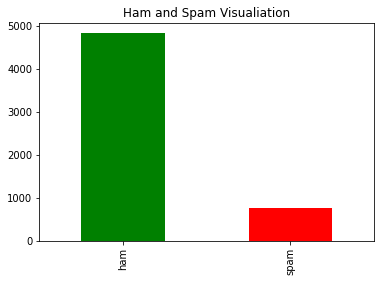

In [6]:
# plot the visualization spam and ham using count plot
count_class = sms_df['label'].value_counts(sort=True)
count_class.plot(kind="bar",color=['green','red'])
plt.title('Ham and Spam Visualiation')
plt.show()

In [7]:
# using the count vectorizer for this dataset
fx = feature_extraction.text.CountVectorizer(stop_words="english")
X = fx.fit_transform(sms_df['message'])
np.shape(X)

(5572, 8404)

In [8]:
# encode the ham and spam to 0 and 1
sms_df['label'] = sms_df['label'].map({'spam':1,'ham':0})
sms_df.dtypes
sms_df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# split the train and test data
X_train,X_test,y_train,y_test = train_test_split(X,sms_df['label'],test_size=0.3,random_state=42)

In [10]:
# Random forest (tree based algorithms works well on imbalanced dataset so we using random forest here)
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [13]:
# predict the test set
y_pred=rf_model.predict(X_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label=1, average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))

Precision : 0.995 / Recall : 0.826 / fscore : 0.903 / Accuracy: 0.977


In [16]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [19]:
accuracy_score(y_test,y_pred)

0.9766746411483254

In [23]:
proba_score = rf_model.predict_proba(X_test)

In [30]:
proba_score = [p[1] for p in proba_score]
proba_score

0.9814617528841287